In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [22]:
df = pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [24]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [25]:
df.shape

(8807, 12)

In [26]:
# un-nesting the columns to solve multilable, only for full column

df['listed_in'] = df['listed_in'].str.split(',')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...


In [27]:
df_unnested = df.explode('listed_in').reset_index(drop=True)
df_unnested.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19323 entries, 0 to 19322
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       19323 non-null  object
 1   type          19323 non-null  object
 2   title         19323 non-null  object
 3   director      13439 non-null  object
 4   cast          17819 non-null  object
 5   country       17601 non-null  object
 6   date_added    19303 non-null  object
 7   release_year  19323 non-null  int64 
 8   rating        19317 non-null  object
 9   duration      19320 non-null  object
 10  listed_in     19323 non-null  object
 11  description   19323 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.8+ MB


In [28]:
#check whether null could be deleted, check the ratio

(df_unnested.isna().sum()) / len(df) * 100

show_id          0.000000
type             0.000000
title            0.000000
director        66.810492
cast            17.077325
country         19.552629
date_added       0.227092
release_year     0.000000
rating           0.068128
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [29]:
#missing --> fill 
df_unnested['director'] = df_unnested['director'].fillna('unknown director')
df_unnested['country'] = df_unnested['country'].fillna('unknown country')
df_unnested['cast'] = df_unnested['cast'].fillna('unknown cast')

df_unnested.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      20
release_year     0
rating           6
duration         3
listed_in        0
description      0
dtype: int64

In [30]:
#missing --> delete
df_unnested.dropna(inplace=True, axis=0, subset=['date_added','rating'])
df_unnested.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [31]:
df_unnested['cast'] = df_unnested['cast'].str.split(',')
df_cast = df_unnested.explode('cast').reset_index(drop=True)
df_cast.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,unknown director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,unknown director,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,unknown director,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [33]:
df_cast.shape

(149287, 12)

In [36]:
df_cast.drop(columns=['date_added'], inplace=True)
df_cast.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,TV Show,Blood & Water,unknown director,Khosi Ngema,South Africa,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
3,TV Show,Blood & Water,unknown director,Gail Mabalane,South Africa,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
4,TV Show,Blood & Water,unknown director,Thabang Molaba,South Africa,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [38]:
df_cast['country'].value_counts().iloc[:10]

United States      38467
India              19816
unknown country    11142
Japan               6504
United Kingdom      5153
South Korea         4234
Spain               3370
Mexico              2588
Canada              2543
Turkey              2446
Name: country, dtype: int64

In [39]:
df_cast[df_cast['director'] != 'unknow director']['director'].value_counts()

unknown director                 44403
Cathy Garcia-Molina                356
Youssef Chahine                    288
Martin Scorsese                    273
David Dhawan                       270
                                 ...  
Noel Dockstader, Quinn Kanaly        1
Tom Stubberfield                     1
Peter Yost                           1
Daniel McCabe                        1
Kirsten Johnson                      1
Name: director, Length: 4528, dtype: int64

In [40]:
df_cleaned = df_cast[df_cast['country'] != 'unknown country']
df_cleaned.shape

(138145, 10)

In [41]:
top_10_countries = df_cleaned['country'].value_counts().iloc[:10]
top_10_countries

United States     38467
India             19816
Japan              6504
United Kingdom     5153
South Korea        4234
Spain              3370
Mexico             2588
Canada             2543
Turkey             2446
Nigeria            2229
Name: country, dtype: int64

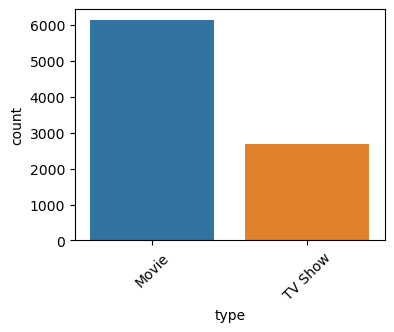

In [42]:
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x='type')
plt.xticks(rotation=45)
plt.show()

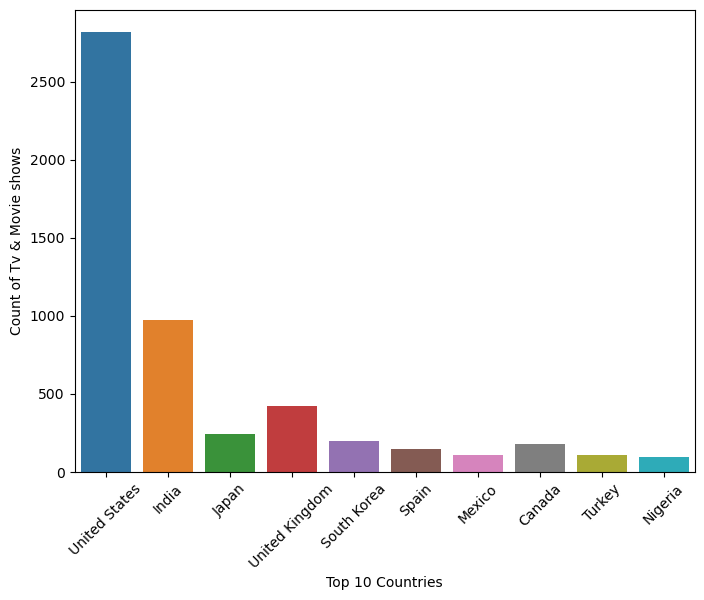

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df[df['country'].isin(top_10_countries.index)],x='country',order=top_10_countries.index)
plt.xticks(rotation=45)
plt.xlabel('Top 10 Countries')
plt.ylabel('Count of Tv & Movie shows')
plt.show()

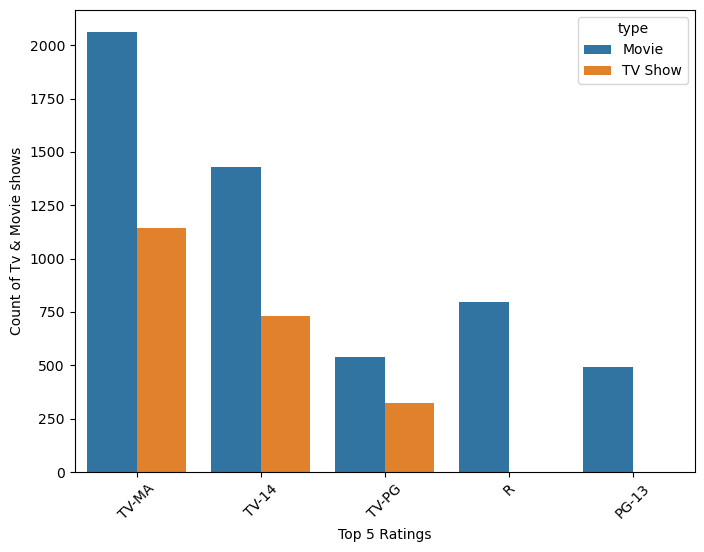

In [46]:
top_5_rating=df['rating'].value_counts().iloc[:5]

plt.figure(figsize=(8,6))
sns.countplot(data=df[df['rating'].isin(top_5_rating.index)],x='rating',order=top_5_rating.index,hue='type')
plt.xticks(rotation=45)
plt.xlabel('Top 5 Ratings')
plt.ylabel('Count of Tv & Movie shows')
plt.show()

In [47]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['week_added'] = df['date_added'].dt.isocalendar().week
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",38
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t...",38
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...,38
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",38
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...,38


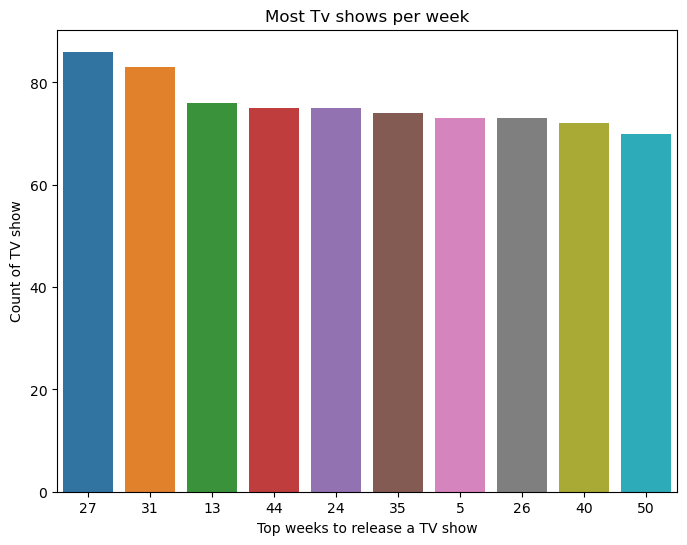

In [48]:
top_10_weeks_TV_show=df[df['type']=='TV Show'].groupby('week_added')['title'].count().sort_values(ascending=False).iloc[:10]
plt.figure(figsize=(8,6))
sns.barplot(x=top_10_weeks_TV_show.index,y=top_10_weeks_TV_show.values,order=top_10_weeks_TV_show.index)
plt.xlabel('Top weeks to release a TV show')
plt.ylabel('Count of TV show')
plt.title('Most Tv shows per week')
plt.show()

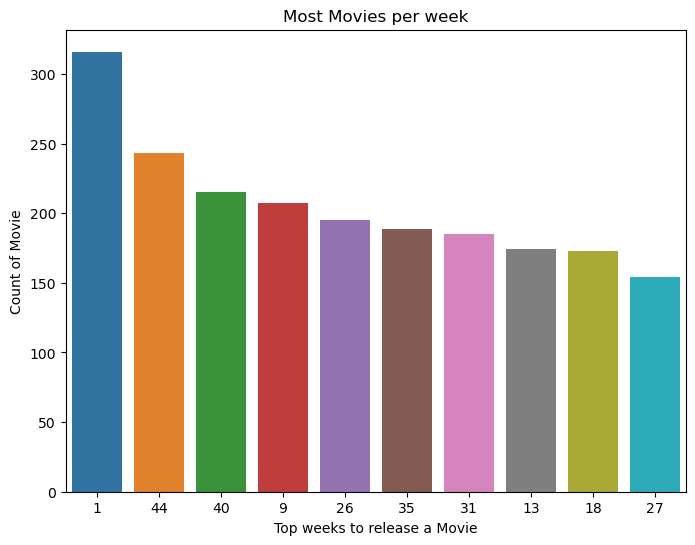

In [49]:
top_10_weeks_Movies=df[df['type']=='Movie'].groupby('week_added')['title'].count().sort_values(ascending=False).iloc[:10]
plt.figure(figsize=(8,6))
sns.barplot(x=top_10_weeks_Movies.index,y=top_10_weeks_Movies.values,order=top_10_weeks_Movies.index)
plt.xlabel('Top weeks to release a Movie')
plt.ylabel('Count of Movie')
plt.title('Most Movies per week')
plt.show()

In [50]:
df['month_added']=df['date_added'].dt.month_name()
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",38,September
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t...",38,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...,38,September
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",38,September
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...,38,September


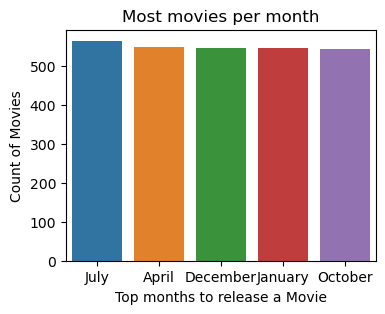

In [52]:
top_5_months_movies=df[df['type']=='Movie'].groupby('month_added')['title'].count().sort_values(ascending=False).iloc[:5]
plt.figure(figsize=(4,3))
sns.barplot(x=top_5_months_movies.index,y=top_5_months_movies.values,order=top_5_months_movies.index)
plt.xlabel('Top months to release a Movie')
plt.ylabel('Count of Movies')
plt.title('Most movies per month')
plt.show()

In [53]:
df_cast['cast'] = df_cast['cast'].str.strip()
top_10_actor_movie=df_cast[(df_cast['type']=='Movie')&(df_cast['cast']!='unknown cast')].groupby('cast')['title'].count().sort_values(ascending=False).iloc[:10]
top_10_actor_movie

cast
Anupam Kher         117
Shah Rukh Khan       99
Naseeruddin Shah     92
Akshay Kumar         85
Paresh Rawal         79
Om Puri              78
Amitabh Bachchan     76
Boman Irani          72
Kareena Kapoor       67
Salman Khan          59
Name: title, dtype: int64

In [54]:
top_10_actor_Tv_show=df_cast[(df_cast['type']=='TV Show')&(df_cast['cast']!='unknown cast')].groupby('cast')['title'].count().sort_values(ascending=False).iloc[:10]
top_10_actor_Tv_show

cast
Takahiro Sakurai      55
Yuki Kaji             44
David Attenborough    41
Ai Kayano             39
Junichi Suwabe        38
Yuichi Nakamura       38
Daisuke Ono           37
Jun Fukuyama          36
Yoshimasa Hosoya      33
Hiroshi Kamiya        31
Name: title, dtype: int64

In [55]:
top_10_director_movie=df[(df['type']=='Movie')&(df['director']!='unknown director')].groupby('director')['title'].count().sort_values(ascending=False).iloc[:10]
top_10_director_movie

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Jay Chapman               12
Youssef Chahine           12
Steven Spielberg          11
Name: title, dtype: int64

In [56]:
df_unnested.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[unknown cast],United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown director,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,unknown director,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,unknown director,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",unknown country,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...


In [57]:
df_unnested['listed_in']=df_unnested['listed_in'].str.strip()
df_unnested[df_unnested['type']=='Movie'].groupby('listed_in')['title'].count().sort_values(ascending=False)

listed_in
International Movies        2752
Dramas                      2426
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Horror Movies                357
Stand-Up Comedy              343
Sci-Fi & Fantasy             243
Sports Movies                219
Classic Movies               116
LGBTQ Movies                 102
Cult Movies                   71
Anime Features                71
Faith & Spirituality          65
Movies                        56
Name: title, dtype: int64

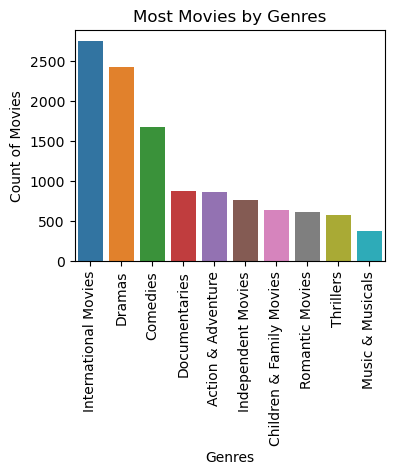

In [58]:
top_10_movie_genres=df_unnested[df_unnested['type']=='Movie']['listed_in'].value_counts().iloc[:10]
plt.figure(figsize=(4, 3))
sns.barplot(x=top_10_movie_genres.index,y=top_10_movie_genres.values,order=top_10_movie_genres.index)
plt.xlabel('Genres')
plt.ylabel('Count of Movies')
plt.title('Most Movies by Genres')
plt.xticks(rotation=90)
plt.show()

In [59]:
df_movie_genres = df_unnested[df_unnested['type'] == 'Movie']
all_genres = ' '.join(df_movie_genres['listed_in'].apply(lambda x:x.replace(',', ' ')))

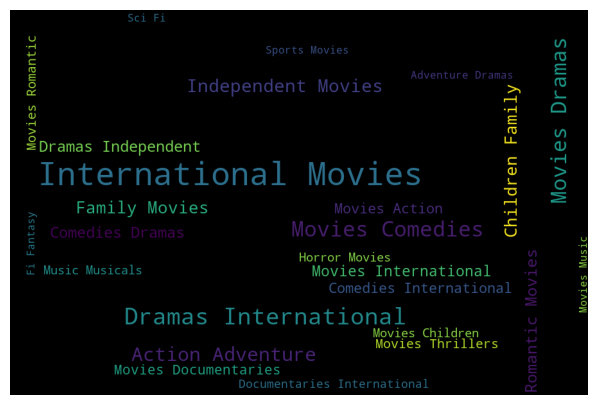

In [67]:
wordcloud = WordCloud(width=900, height=600,
                     background_color='Black',
                      max_words=100, max_font_size=50,
                     min_font_size=16, random_state=50).generate(all_genres)
plt.figure(figsize = (10, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")

plt.show()